In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import shap


In [2]:
df = pd.read_csv(r'C:\Users\NickBowen\Projects\NFL Data Project\Game Data\NFL_TeamGame_Stats2024 - Sheet1.csv')

In [3]:
# Split the data into features and target
X = df.drop(['Points','Week','Win/Loss','Opponent Points','Time of Possesion','Opponent','Team'], axis=1)
y = df['Points']

In [4]:
# Define categorical columns after dropping the specified columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [5]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a column transformer for one-hot encoding and imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Ignore unknown categories
        ]), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['float64', 'int64']).columns)  # Impute missing values with the mean for numerical columns
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

In [8]:
# Dictionary to store the results
results = {}

for name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    # Print the results for each model
    print(f"{name} - MAE: {mae}, MSE: {mse}, R2: {r2}")

Linear Regression - MAE: 4.514202542059358, MSE: 32.27162362374439, R2: 0.581037634302757
Decision Tree - MAE: 5.7, MSE: 49.4, R2: 0.358670604654182
Random Forest - MAE: 4.242, MSE: 31.884169999999994, R2: 0.5860677030930512
Gradient Boosting - MAE: 4.432054558302435, MSE: 32.15175070672223, R2: 0.582593869634582


                        MAE        MSE        R2
Linear Regression  4.514203  32.271624  0.581038
Decision Tree      5.700000  49.400000  0.358671
Random Forest      4.242000  31.884170  0.586068
Gradient Boosting  4.432055  32.151751  0.582594


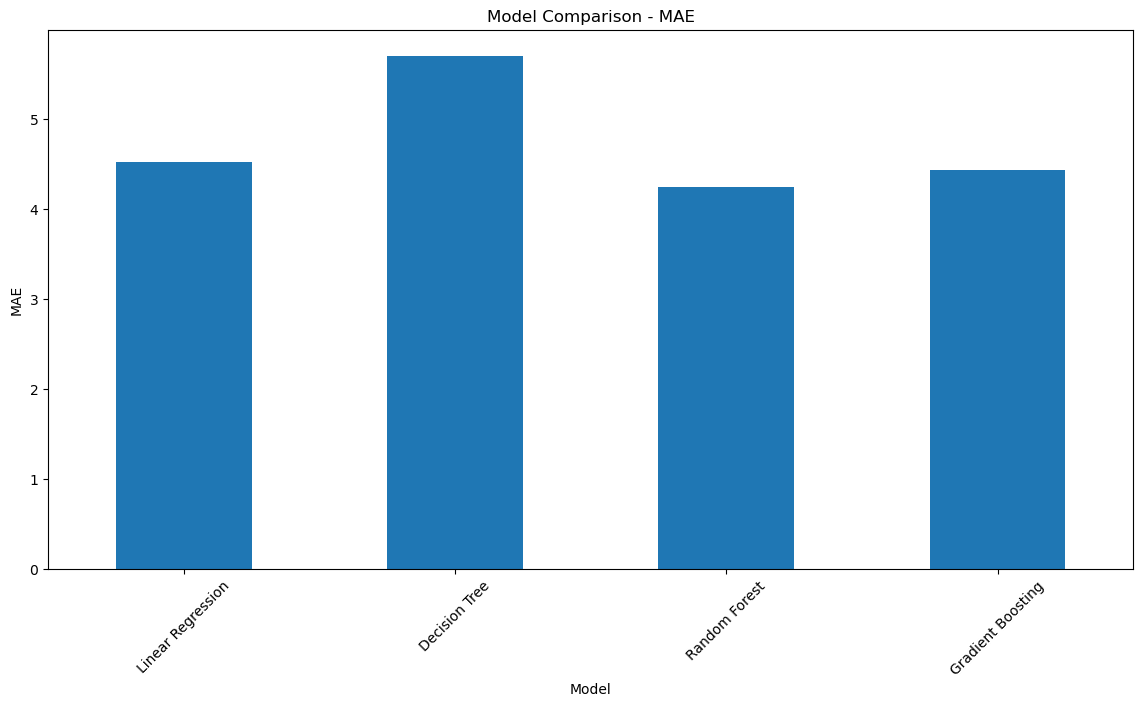

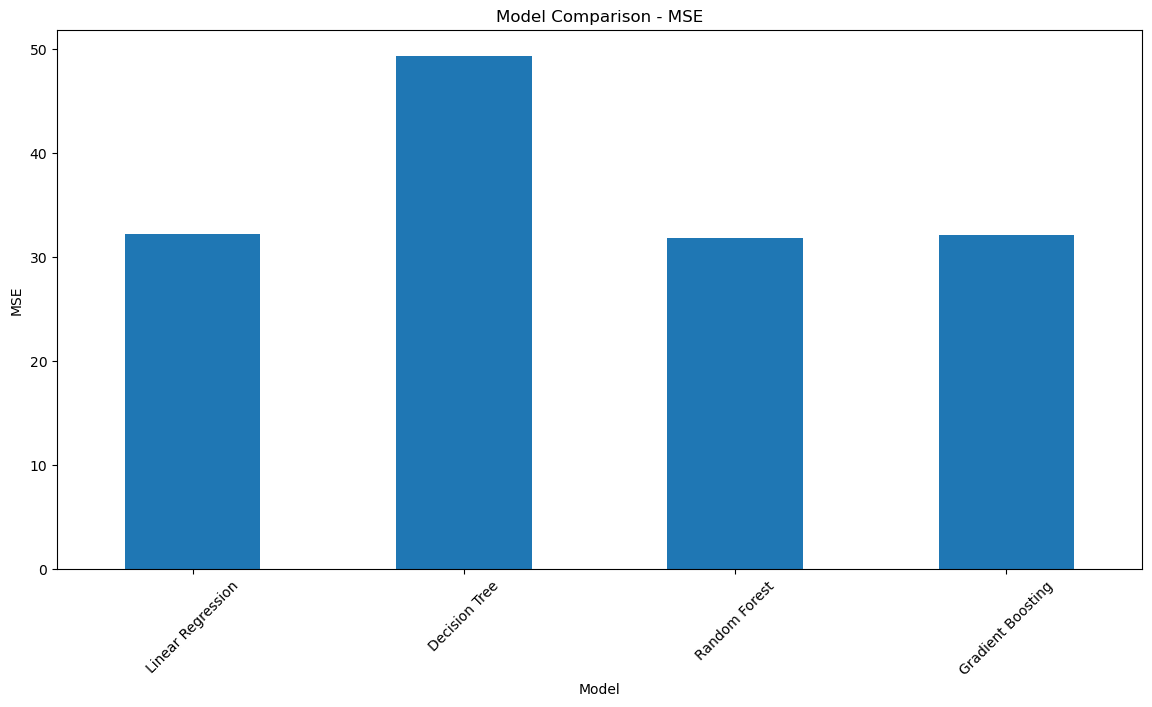

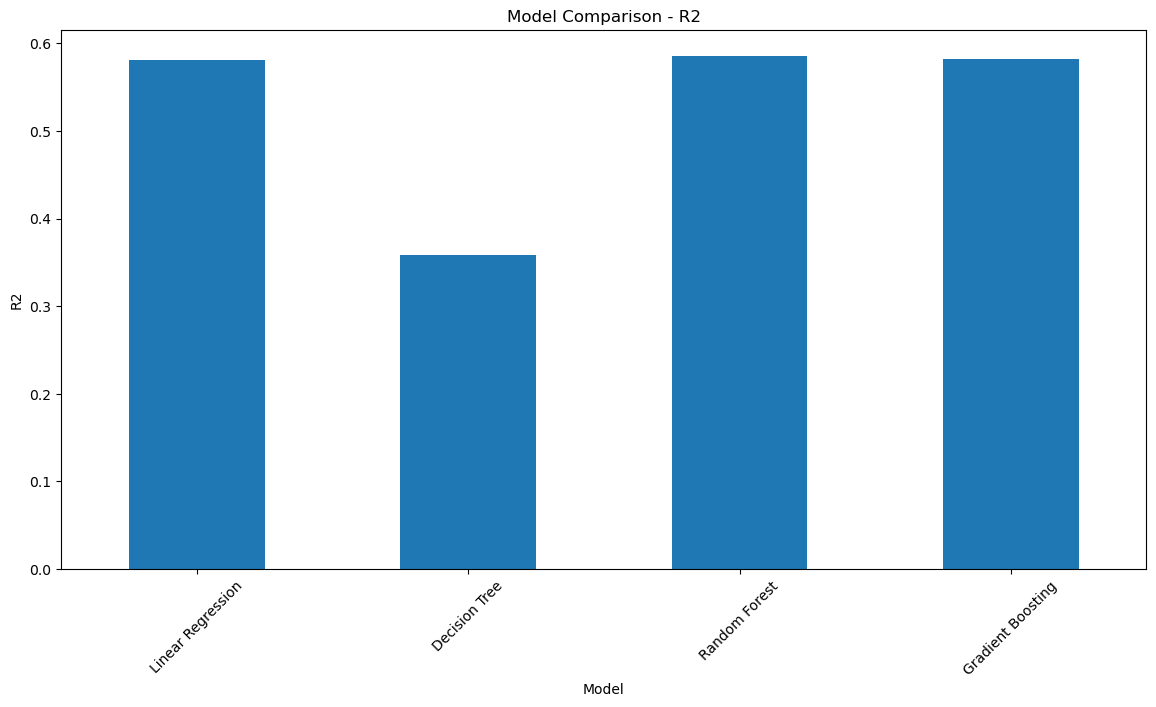

In [11]:
# Assuming 'results' is a dictionary with model performance metrics
# Convert the results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)

# Plot each performance metric in its own chart
metrics = results_df.columns

for metric in metrics:
    plt.figure(figsize=(14, 7))
    results_df[metric].plot(kind='bar')
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()